In [75]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [23]:
df = pd.read_csv('VoiceDataset_v2.csv')

In [24]:
df

,Uid,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spec_flatness,rolloff,zero_crossing_rate,mel_spectrogram,...,Openness,Conscientiousness,Extroversion,Agreeableness,Neuroticism,AgrLabel,ConLabel,ExtLabel,NeuLabel,OpeLabel
0,001838d3-6a52-46fd-8148-c513d1f93803,0.336708,0.032996,1644.843925,1721.050342,21.627610,0.007552,3141.180700,0.079815,0.384842,...,20,44,88,89,59,High,Low,High,High,Low
1,0125a9d4-aafc-488c-8e46-b56fdff20dd3,0.367423,0.025868,1493.837652,1679.740795,21.025815,0.006887,2859.898931,0.064729,0.227198,...,53,80,58,78,33,High,High,High,Low,High
2,04111275-7eb2-41ed-8a56-63db2d43939e,0.328803,0.059427,1940.823467,1944.163025,21.013538,0.012110,3488.833467,0.103414,1.019879,...,63,61,53,45,84,Low,High,High,High,High
3,055fa6b4-440f-46c1-8a8f-e613865b4909,0.404462,0.007059,1775.270175,2015.629372,19.798029,0.041080,3521.508050,0.072894,0.016173,...,48,39,22,45,63,Low,Low,Low,High,Low
4,05fa7689-c586-42fe-b227-c0f757414584,0.339427,0.033557,1287.543763,1444.103085,21.906978,0.006179,2454.857415,0.063702,0.417729,...,42,75,44,50,25,High,High,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,f85f2ada-cc83-4c91-aaea-3e97574b5287,0.293230,0.051077,1614.230279,1611.167293,21.339987,0.006820,2998.858900,0.084945,0.917666,...,54,80,16,69,48,High,High,Low,Low,High
80,fc6b3185-2e72-4346-80f2-63f387b89648,0.297534,0.008724,2945.621755,2418.189677,23.803931,0.020868,5923.754816,0.185059,0.027264,...,67,87,75,56,63,High,High,High,High,High
81,fcd279bb-24a2-471a-9d20-1116df5ae8c5,0.343698,0.027866,1475.286679,1625.917360,22.279028,0.012637,2579.684137,0.072178,0.245610,...,42,34,53,34,63,Low,Low,High,High,Low
82,fe85dcea-5851-440b-a131-2c5fed228d6b,0.328803,0.059427,1940.823467,1944.163025,21.013538,0.012110,3488.833467,0.103414,1.019879,...,63,61,53,45,84,Low,High,High,High,High


## Running analysis by considering ConLabel as target class

i. general analysis:

In [25]:
df.describe()

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spec_flatness,rolloff,zero_crossing_rate,mel_spectrogram,mfcc1,...,d2_mfcc9,d2_mfcc10,d2_mfcc11,d2_mfcc12,d2_mfcc13,Openness,Conscientiousness,Extroversion,Agreeableness,Neuroticism
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,...,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.359363,0.031490,1694.189616,1809.236692,21.468132,0.016273,3258.378930,0.082834,0.505039,-384.228788,...,0.002329,0.000391,0.000054,0.000242,0.002311,34.011905,49.380952,47.547619,44.880952,54.059524
std,0.065391,0.023388,542.845969,427.433486,1.778141,0.018234,1181.618923,0.036102,0.798777,105.585831,...,0.009366,0.007595,0.006677,0.008427,0.008658,23.774287,26.186497,22.090943,25.827232,17.676716
min,0.147994,0.000059,724.661513,888.537788,16.325717,0.000305,645.461493,0.026659,0.000001,-815.485413,...,-0.025161,-0.027003,-0.014437,-0.048858,-0.027926,2.000000,1.000000,4.000000,2.000000,13.000000
25%,0.317614,0.014997,1350.305155,1505.388980,20.433870,0.005962,2549.531525,0.060081,0.070369,-455.060883,...,-0.002991,-0.003432,-0.004734,-0.003996,-0.001878,11.000000,28.000000,30.000000,21.000000,41.000000
50%,0.346240,0.028585,1617.797605,1797.192939,21.352111,0.012115,3085.612299,0.078853,0.288980,-375.238983,...,0.000603,-0.000743,-0.000773,0.000642,0.001152,30.000000,50.000000,46.000000,44.000000,50.000000
75%,0.395271,0.041843,1961.960174,2017.661165,22.514230,0.020251,3717.760460,0.102505,0.621261,-314.238846,...,0.005614,0.004447,0.003697,0.005482,0.003774,53.000000,68.000000,67.000000,65.000000,67.000000
max,0.566635,0.128910,3468.430153,3312.885205,25.124245,0.133692,7892.027599,0.228382,6.125451,-185.966125,...,0.034829,0.022307,0.016714,0.022880,0.045713,89.000000,97.000000,93.000000,95.000000,93.000000


In [26]:
df.describe(include='O')

,Uid,AgrLabel,ConLabel,ExtLabel,NeuLabel,OpeLabel
count,84,84,84,84,84,84
unique,84,2,2,2,2,2
top,27da57fe-439d-4684-a4aa-a91c25e91984,Low,High,Low,High,Low
freq,1,48,44,46,43,61


Features Selection: 

i. feature selection using random forest:

In [27]:
df.columns

Index(['Uid', 'chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth',
       'spectral_contrast', 'spec_flatness', 'rolloff', 'zero_crossing_rate',
       'mel_spectrogram', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6',
       'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13',
       'd_mfcc1', 'd_mfcc2', 'd_mfcc3', 'd_mfcc4', 'd_mfcc5', 'd_mfcc6',
       'd_mfcc7', 'd_mfcc8', 'd_mfcc9', 'd_mfcc10', 'd_mfcc11', 'd_mfcc12',
       'd_mfcc13', 'd2_mfcc1', 'd2_mfcc2', 'd2_mfcc3', 'd2_mfcc4', 'd2_mfcc5',
       'd2_mfcc6', 'd2_mfcc7', 'd2_mfcc8', 'd2_mfcc9', 'd2_mfcc10',
       'd2_mfcc11', 'd2_mfcc12', 'd2_mfcc13', 'Openness', 'Conscientiousness',
       'Extroversion', 'Agreeableness', 'Neuroticism', 'AgrLabel', 'ConLabel',
       'ExtLabel', 'NeuLabel', 'OpeLabel'],
      dtype='object')

In [57]:
X = pd.get_dummies(df.drop(['ConLabel','Uid'],axis=1))
y = df['ConLabel']

In [58]:
model = RandomForestClassifier()
model.fit(X,y)

RandomForestClassifier()

In [59]:
importance = pd.DataFrame({'features': X.columns, 'importance':model.feature_importances_})
importance = importance.sort_values(by=['importance'], ascending=False)

<AxesSubplot:xlabel='importance', ylabel='features'>

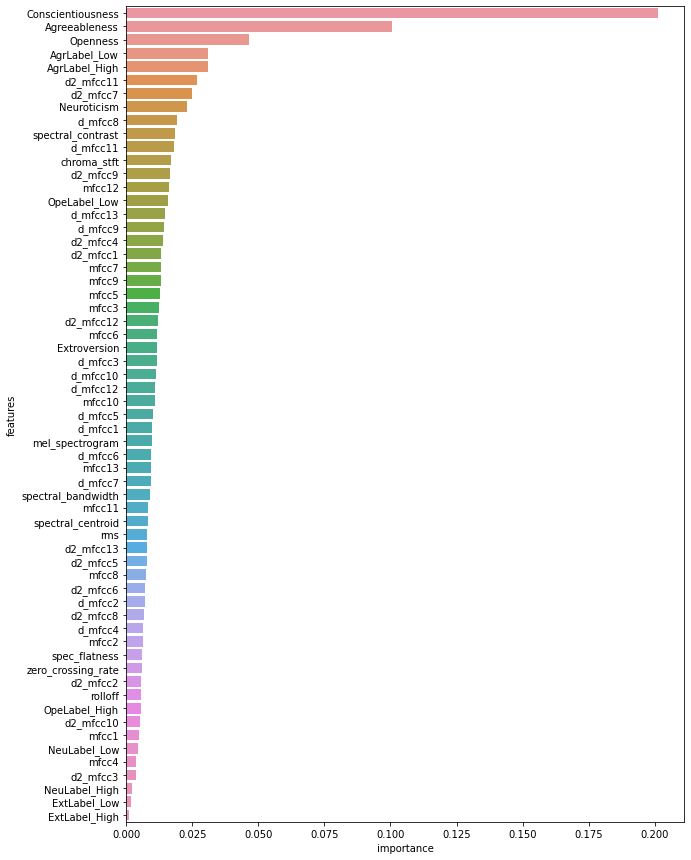

In [60]:
fig, ax = plt.subplots(figsize=(10,15))
sns.barplot(y='features', x='importance', data=importance)

## Baseline model: 

In [68]:
X = df.drop(['Uid','ConLabel'],axis=1)
y = df['ConLabel']

In [69]:
X = pd.get_dummies(X)

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y)

i. Random Forest: 

In [71]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [72]:
np.mean(cross_val_score(model,X_train,Y_train,cv=5))*100

95.38461538461537

In [73]:
pred = model.predict(X_test)

In [74]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00         8
         Low       1.00      1.00      1.00        13

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



ii. SVM

In [76]:
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [78]:
np.mean(cross_val_score(model,X_train,Y_train,cv=5))*100

57.179487179487175

In [79]:
pred = model.predict(X_test)

In [80]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

        High       0.38      1.00      0.55         8
         Low       0.00      0.00      0.00        13

    accuracy                           0.38        21
   macro avg       0.19      0.50      0.28        21
weighted avg       0.15      0.38      0.21        21



/home/sehan/Desktop/Playing_area/env/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
